In [6]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [7]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 81423.31KB/s]
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


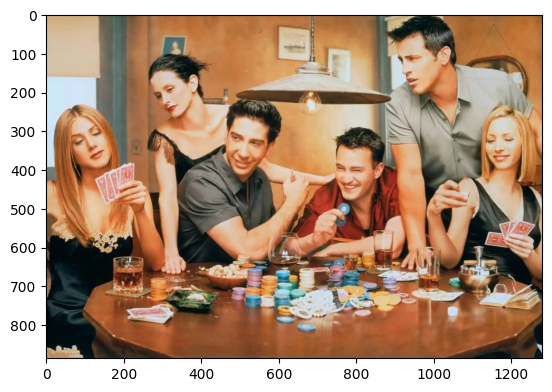

In [8]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [9]:
faces = app.get(img)

In [10]:
faces

[{'bbox': array([466.0821 , 268.6164 , 573.58923, 415.5331 ], dtype=float32),
  'kps': array([[491.85046, 321.8314 ],
         [541.85266, 332.11188],
         [507.67114, 366.41312],
         [485.91965, 369.691  ],
         [533.74945, 378.3811 ]], dtype=float32),
  'det_score': np.float32(0.9196533),
  'landmark_3d_68': array([[ 4.69443695e+02,  2.96989441e+02,  7.57227936e+01],
         [ 4.68134155e+02,  3.12719116e+02,  7.92197113e+01],
         [ 4.66747955e+02,  3.28960175e+02,  8.15076981e+01],
         [ 4.66053284e+02,  3.45325989e+02,  8.09227676e+01],
         [ 4.66922272e+02,  3.62514740e+02,  7.33340378e+01],
         [ 4.71003143e+02,  3.77187256e+02,  6.58566513e+01],
         [ 4.75966827e+02,  3.90255829e+02,  5.81926918e+01],
         [ 4.82846588e+02,  4.03262604e+02,  4.71076164e+01],
         [ 4.97964294e+02,  4.14659698e+02,  4.25628624e+01],
         [ 5.16660706e+02,  4.12995361e+02,  4.67766647e+01],
         [ 5.30892578e+02,  4.03689392e+02,  5.69011154e+

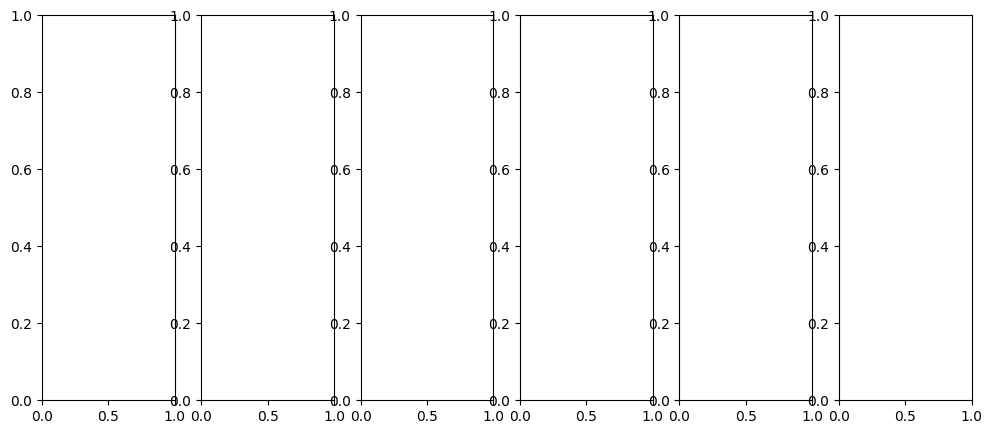

In [11]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1,6, figsize=(12,5))

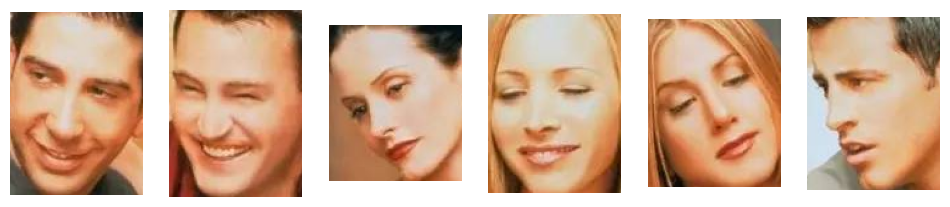

In [12]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1,6, figsize=(12,5))

for i, face in enumerate(faces):
  bbox = face['bbox']
  bbox =[int(b) for b in bbox]
  axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
  axs[i].axis('off')

In [13]:
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(
    repo_id="Aitrepreneur/insightface",
    filename="inswapper_128.onnx"
)
print("Model downloaded to:", model_path)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


inswapper_128.onnx:   0%|          | 0.00/554M [00:00<?, ?B/s]

Model downloaded to: /root/.cache/huggingface/hub/models--Aitrepreneur--insightface/snapshots/fd887cdef0c73f32251198b8160d6771ac413fc0/inswapper_128.onnx


In [14]:
from insightface.model_zoo import get_model

model_path = "/root/.cache/huggingface/hub/models--Aitrepreneur--insightface/snapshots/fd887cdef0c73f32251198b8160d6771ac413fc0/inswapper_128.onnx"
swapper = get_model(model_path, download=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


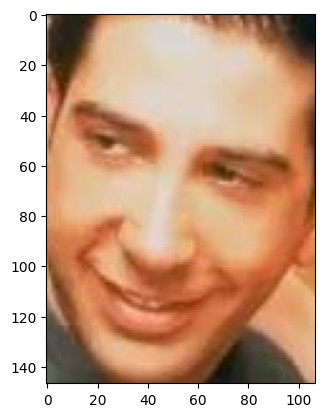

In [15]:
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
plt.show()

In [16]:
res = img.copy()
for face in faces:
  res = swapper.get(res, face, source_face, paste_back=True)


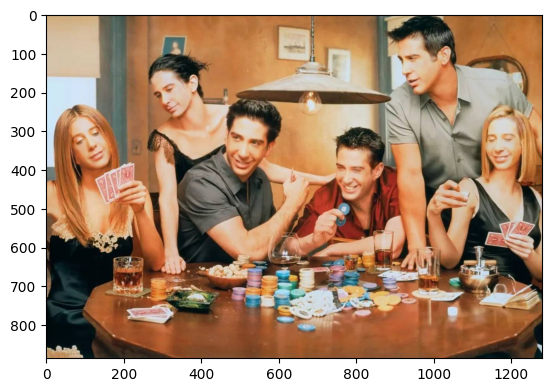

In [17]:
plt.imshow(res[:,:,::-1])
plt.show()

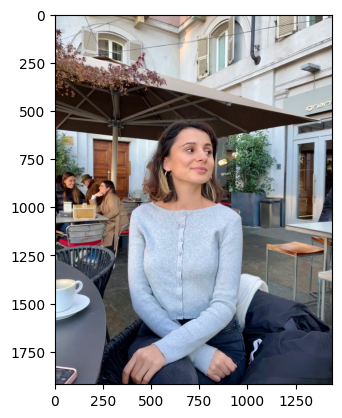

In [21]:
rob = cv2.imread('/content/image_50802177.JPG')
plt.imshow(rob[:,:,::-1])
plt.show()

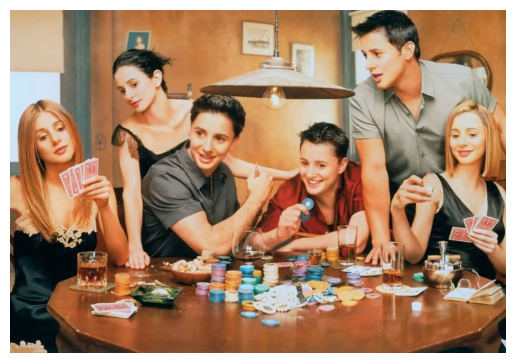

In [24]:
rob_faces = app.get(rob)
rob_face = rob_faces[0]

res = img.copy()
for face in faces:
    res = swapper.get(res, face, rob_face, paste_back=True)

fig, ax = plt.subplots()
ax.imshow(res[:, :, ::-1])
ax.axis('off')
plt.show()


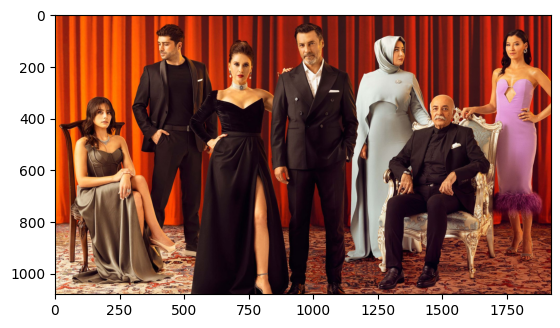

In [26]:
monty = cv2.imread('/content/3621319_1920x1080.jpg')
plt.imshow(monty[:,:,::-1])
plt.show()

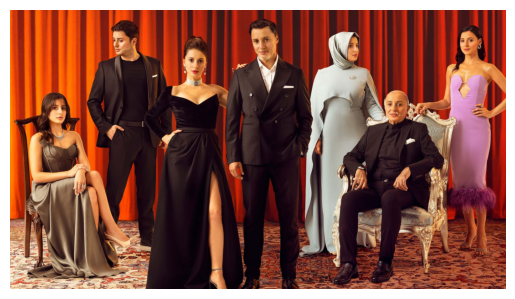

In [27]:
faces = app.get(monty)
res = monty.copy()
for face in faces:
  res = swapper.get(res, face, rob_face, paste_back=True)
fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()